# Feature Engineering (FE) & Exploratory Data Analysis (EDA) for Loan Default Prediction
Author: Shanrong Zhou

Machine learning techniques are increasingly being used in the loan default prediction. When constructing a predictive model, it is very important to extract the useful features from the loan and borrower data. 
- Objectives: This report uses a hypothetical loan dataset to conduct the Exploratory Data Analysis (EDA) and Feature Engineering (FE) process for loan default prediction, and then builds a simple logistic regression model, and measures the model improvement after the feature transformation. 
- Dataset: The dataset contains information on loan application details, borrower's credit history from Credit Bureau, borrower's financial query records, borrower's call records, and third-party data. 

# Table of Contents
- [Section 1 Data Preparation](#1)
    - [1.1 Understanding Data](#11)
    - [1.2 Data Splitting](#12)
- [Section 2 Exploratory Data Analysis](#2)
    - [2.1 Multiple Variables Interactions - Correlation Plot](#21)
    - [2.2 Data Binning](#22)
    - [2.3 Data Analysis - Distribution & Relationships](#23)
- [Section 3 Feature Engineering](#3)
  - [3.1 WOE Transformation](#31)
  - [3.2 Aligning Train & Test Datasets](#32)
- [Section 4 Predictive Modeling](#4)

## Section 1 Data Preparation <a class="anchor" id="1"></a>

In [1]:
import pandas as pd
path = '/Users/alicezhou/Documents/Columbia/5420 Anomaly Detection/3. Exploratory Data Analysis (EDA)_Industry Case - Mortgage Probability of Default & Fraud/Assignment3/'
df = pd.read_csv(path + 'XYZloan_default_selected_vars.csv') 
df.head(5)

,Unnamed: 0.1,Unnamed: 0,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,...,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,...,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,3,4,4,0,34,2,4,12,2017/7/7 10:10,android,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


In [2]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,id,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,...,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,...,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.00000,79619.000000,79619.000000,77207.000000
mean,39999.500000,40000.500000,40000.500000,0.193600,31.706913,1.321813,2.014925,11.235413,3.30130,3.117200,...,6.911956,14.271694,11.773358,909.089313,810.786219,1732.693314,1539.33443,2513.226491,2229.606137,5.976272
std,23094.155105,23094.155105,23094.155105,0.395121,7.075070,0.467174,1.196806,2.212313,1.33655,1.306335,...,28.007499,38.235012,33.270641,1379.553332,1245.044602,2441.503517,2172.71384,3404.975112,3005.615048,3.641814
min,0.000000,1.000000,1.000000,0.000000,20.000000,1.000000,1.000000,3.000000,1.00000,1.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.00000,-99.000000,-99.000000,0.000000
25%,19999.750000,20000.750000,20000.750000,0.000000,27.000000,1.000000,1.000000,12.000000,2.00000,2.000000,...,2.000000,5.000000,4.000000,84.000000,34.000000,309.000000,226.00000,539.000000,414.000000,3.000000
50%,39999.500000,40000.500000,40000.500000,0.000000,30.000000,1.000000,1.000000,12.000000,3.00000,3.000000,...,7.000000,12.000000,10.000000,475.000000,397.000000,1023.000000,870.00000,1553.000000,1324.000000,5.000000
75%,59999.250000,60000.250000,60000.250000,0.000000,35.000000,2.000000,3.000000,12.000000,5.00000,4.000000,...,14.000000,23.000000,20.000000,1209.000000,1080.000000,2287.000000,2030.00000,3296.000000,2936.000000,8.000000
max,79999.000000,80000.000000,80000.000000,1.000000,56.000000,2.000000,6.000000,12.000000,5.00000,5.000000,...,1061.000000,2792.000000,1579.000000,48585.000000,29664.000000,88364.000000,54651.00000,125352.000000,87312.000000,47.000000


In [3]:
# check dimensions of the dataset, we found it has 80,000 rows and 89 columns 
print(df.shape)

(80000, 89)


###  1.1 Understanding Data<a class="anchor" id="11"></a>

Some basic understandings of the raw data:
- Each raw is a borrower (id), and the other variables are the information related to this borrower.
- For the loan default predictive model, "loan_default" is the target variable.
- There are more than 80 variables that can be used as input variables. I am going to select 15 variables for EDA and FE. Based on data dictionary and business industrial knowledge, I will change the variable names for better representation.  

In [6]:
# Select the variables to be analysed 
df = df[['loan_default', 'AP001', 'AP003', 'AP008',
    'CR009', 'CR015', 'CR019',
    'PA022', 'PA023', 'PA029',
    'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']]

# Change column names 
df.columns = ['target', 'age', 'education', 'times_of_changing_location_city',
             'total_loan_amount_in_credit_history', 'maximum_monthly_credit_card_mobility', 'single_debit_card_score_or_limit',
             'days_between_loan_application_and_first_collection_or_high-risk_call','days_between_loan_application_and_first_collection_call','average_length_of_inbound_calls_related_to_collections_or_high-risk',
             'count_of_P2P_query_in_the_last_7_days','count_of_P2P_query_in_the_last_1_month','count_of_small_loan_query_in_the_last_1_month','count_of_P2P_query_in_the_last_3_months','count_of_small_loan_query_in_the_last_3_months','count_of_small_loan_query_in_the_last_6_months']

- The below summary statistics motive me to create bins for the continuous variables and convert them to be categorical variables, to better summarize the patterns related to these features.
- It's surprised to see that there are a lot of negative values in the 3 variables that related to borrower's call records. 
    - For 'days between loan application and first collection or high-risk call' and 'days between loan application and first collection call', negative values in these variables could indicate that the collection or high-risk call was made before the loan application date. This could occur if the dataset includes historical data where collections or high-risk activities were initiated prior to the loan application.
    - For 'average length of inbound calls related to collections or high-risk', it is possible that negative values are due to data entry errors or coding mistakes during the data collection process. 

In [7]:
print(df.columns) # check column names
df.describe() # get the Simple Summary Statistics 

Index(['target', 'age', 'education', 'times_of_changing_location_city',
       'total_loan_amount_in_credit_history',
       'maximum_monthly_credit_card_mobility',
       'single_debit_card_score_or_limit',
       'days_between_loan_application_and_first_collection_or_high-risk_call',
       'days_between_loan_application_and_first_collection_call',
       'average_length_of_inbound_calls_related_to_collections_or_high-risk',
       'count_of_P2P_query_in_the_last_7_days',
       'count_of_P2P_query_in_the_last_1_month',
       'count_of_small_loan_query_in_the_last_1_month',
       'count_of_P2P_query_in_the_last_3_months',
       'count_of_small_loan_query_in_the_last_3_months',
       'count_of_small_loan_query_in_the_last_6_months'],
      dtype='object')


,target,age,education,times_of_changing_location_city,total_loan_amount_in_credit_history,maximum_monthly_credit_card_mobility,single_debit_card_score_or_limit,days_between_loan_application_and_first_collection_or_high-risk_call,days_between_loan_application_and_first_collection_call,average_length_of_inbound_calls_related_to_collections_or_high-risk,count_of_P2P_query_in_the_last_7_days,count_of_P2P_query_in_the_last_1_month,count_of_small_loan_query_in_the_last_1_month,count_of_P2P_query_in_the_last_3_months,count_of_small_loan_query_in_the_last_3_months,count_of_small_loan_query_in_the_last_6_months
count,80000.000000,80000.000000,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.000000,79619.000000,79619.000000,79619.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,80000.000000
mean,0.193600,31.706913,2.014925,3.117200,3.518711e+04,4.924750,6.199038,19.298811,14.828822,-42.407356,1.986962,3.593037,1.345700,5.40600,2.020812,2.603662
std,0.395121,7.075070,1.196806,1.306335,6.359684e+04,1.094305,3.359354,39.705478,37.009374,97.006168,1.807445,2.799570,1.413362,4.02311,1.973988,2.505840
min,0.000000,20.000000,1.000000,1.000000,0.000000e+00,2.000000,1.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,27.000000,1.000000,2.000000,4.700000e+03,5.000000,3.000000,-1.000000,-1.000000,-98.000000,1.000000,2.000000,0.000000,3.00000,1.000000,1.000000
50%,0.000000,30.000000,1.000000,3.000000,1.728500e+04,5.000000,5.000000,-1.000000,-1.000000,-98.000000,2.000000,3.000000,1.000000,4.00000,2.000000,2.000000
75%,0.000000,35.000000,3.000000,4.000000,4.075000e+04,6.000000,10.000000,41.000000,14.000000,26.000000,3.000000,5.000000,2.000000,7.00000,3.000000,4.000000
max,1.000000,56.000000,6.000000,5.000000,1.420300e+06,6.000000,12.000000,448.000000,448.000000,2872.000000,20.000000,24.000000,21.000000,46.00000,35.000000,43.000000


In [29]:
print(sum(df['days_between_loan_application_and_first_collection_or_high-risk_call']==-99))
print(sum(df['days_between_loan_application_and_first_collection_or_high-risk_call']==-1))
print(sum(df['days_between_loan_application_and_first_collection_or_high-risk_call']<0))

1534
50639
52173


In [30]:
print(sum(df['days_between_loan_application_and_first_collection_call']==-99))
print(sum(df['days_between_loan_application_and_first_collection_call']==-1))
print(sum(df['days_between_loan_application_and_first_collection_call']<0))

1534
56004
57538


In [31]:
print(sum(df['average_length_of_inbound_calls_related_to_collections_or_high-risk']==-99))
print(sum(df['average_length_of_inbound_calls_related_to_collections_or_high-risk']==-98))
print(sum(df['average_length_of_inbound_calls_related_to_collections_or_high-risk']<0))

1534
53086
54620


There are special values ‘-99’, ‘-98’, ‘-1’, and ’NA’ in the 3 variables that related to borrower's call records. They may be set by different systems. They carry some unique information and are not missing at random. Therefore, I will create categories to include each special value for each variable. 

In [19]:
# check for missing values
df.isnull().sum() 

target                                                                    0
age                                                                       0
education                                                                 0
times_of_changing_location_city                                           0
total_loan_amount_in_credit_history                                       0
maximum_monthly_credit_card_mobility                                      0
single_debit_card_score_or_limit                                          0
days_between_loan_application_and_first_collection_or_high-risk_call    381
days_between_loan_application_and_first_collection_call                 381
average_length_of_inbound_calls_related_to_collections_or_high-risk     381
count_of_P2P_query_in_the_last_7_days                                     0
count_of_P2P_query_in_the_last_1_month                                    0
count_of_small_loan_query_in_the_last_1_month                             0
count_of_P2P

###  1.2 Data Splitting <a class="anchor" id="12"></a>

To assess how effectively our machine learning model works, we must divide a dataset into training and testing sets. Constructing a train test split before EDA can be helpful. This allows us to see if any conclusions we draw from visualizations generalize to new data.

In [55]:
# data split for train and test
from sklearn.model_selection import train_test_split

features = df.columns.drop('target')
X_train, X_test, Y_train, Y_test = train_test_split(df[features],
                                                    df['target'], 
                                                    random_state=0)

By checking the count of target variable, we know that only a small part of the target variable consists of people who default on loans.

In [56]:
# Check the number of default cases in train dataset
Y_train.value_counts()

0    48287
1    11713
Name: target, dtype: int64

In [57]:
# Check the number of default cases in test dataset
Y_test.value_counts()

0    16225
1     3775
Name: target, dtype: int64

In [58]:
#Save the current datasets with raw variables, to prepare the comparison with datasets after FE
X_train_raw = X_train.copy()
X_test_raw = X_test.copy()

## Section 2 Exploratory Data Analysis <a class="anchor" id="2"></a>

###  2.1 Multiple Variables Interactions - Correlation Plot <a class="anchor" id="21"></a>

Since all the raw variables are numeric variables, the first thing came to my mind is to check their correlation matrix. By plotting the correlation chart as shown below, we can clearly see that: 
1. variables falling into same data category have the strongest relationship to each other. For example, call records data, including 'days between loan application and first collection or high-risk call', 'days between loan application and first collection call', and 'average length of inbound calls related to collections or high-risk'. Another example is the borrower's financial query records data. 
2. the possibility of default has the strongest relationship with borrower's financial query records, especially the count of P2P query in the last 3 months (0.14). 
3. the possibility of default has negative but little relatinship with most of the application details (eg. age, education) and credit history data (eg. total loan amount in credit history, maximum monthly credit card mobility, single debit card score). The increase of these factors might contribute to lower the possibility of loan default. 
4. increase of financial spending can be detected from multiple variables. The total amount in credit history, maximum monthly credit card mobility, and single credit card score or limit have moderately strong correlations to each other. 
5. interestingly, higher age could contribute to higher maximum monthly credit card mobility (0.32) and single credit card score or limit (0.25). It could be related to elder people's stronger credit historical performance and more frequent spending needs. 

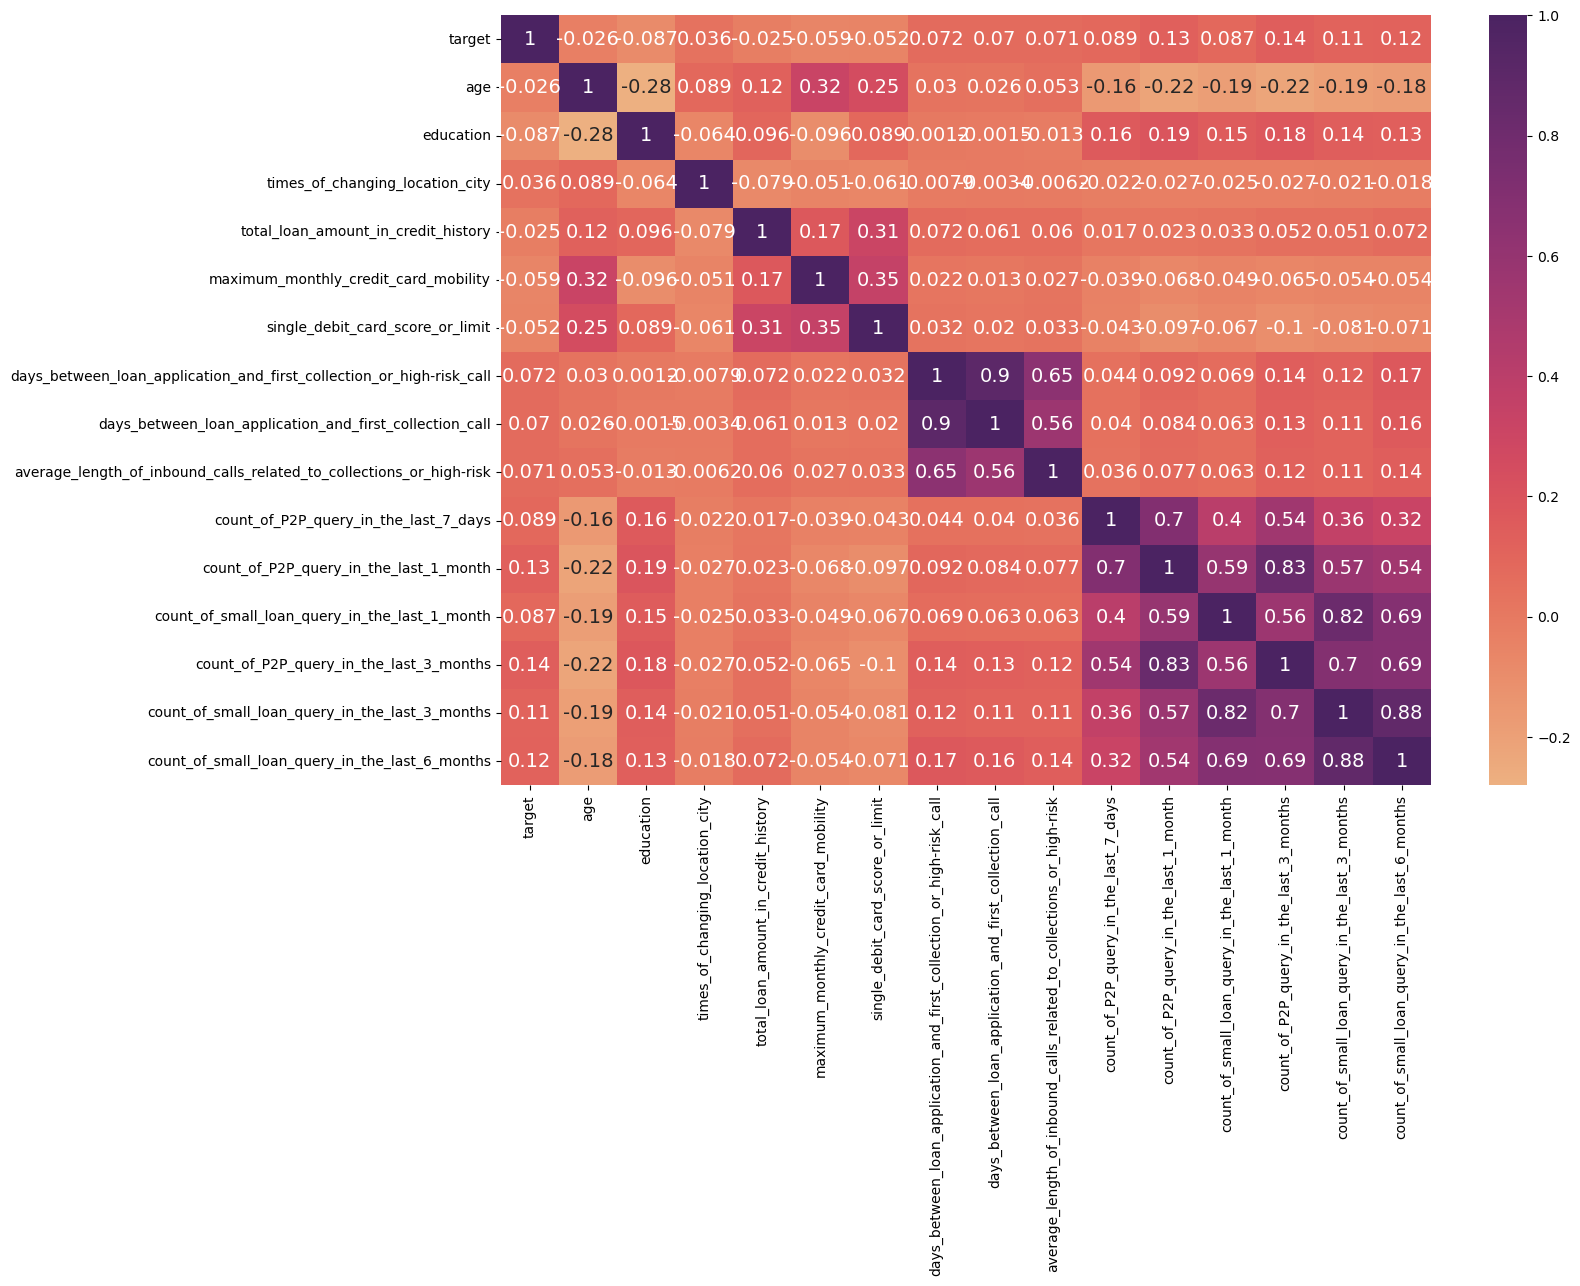

In [59]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the correlation chart
fig, ax = plt.subplots( figsize = (15,10) )
corr_matrix = df.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})
plt.show()

###  2.2 Data Binning<a class="anchor" id="22"></a>

Plotting histograms for all the input variables show their distributions. However, most of them are continuous variables. Data binning is conducted to convert all the variables to categorical variables. The purpose is to capture complex relationships and improve model's prediction accuracy, mitigate the impact of outliers, simplify the model and address data sparsity.

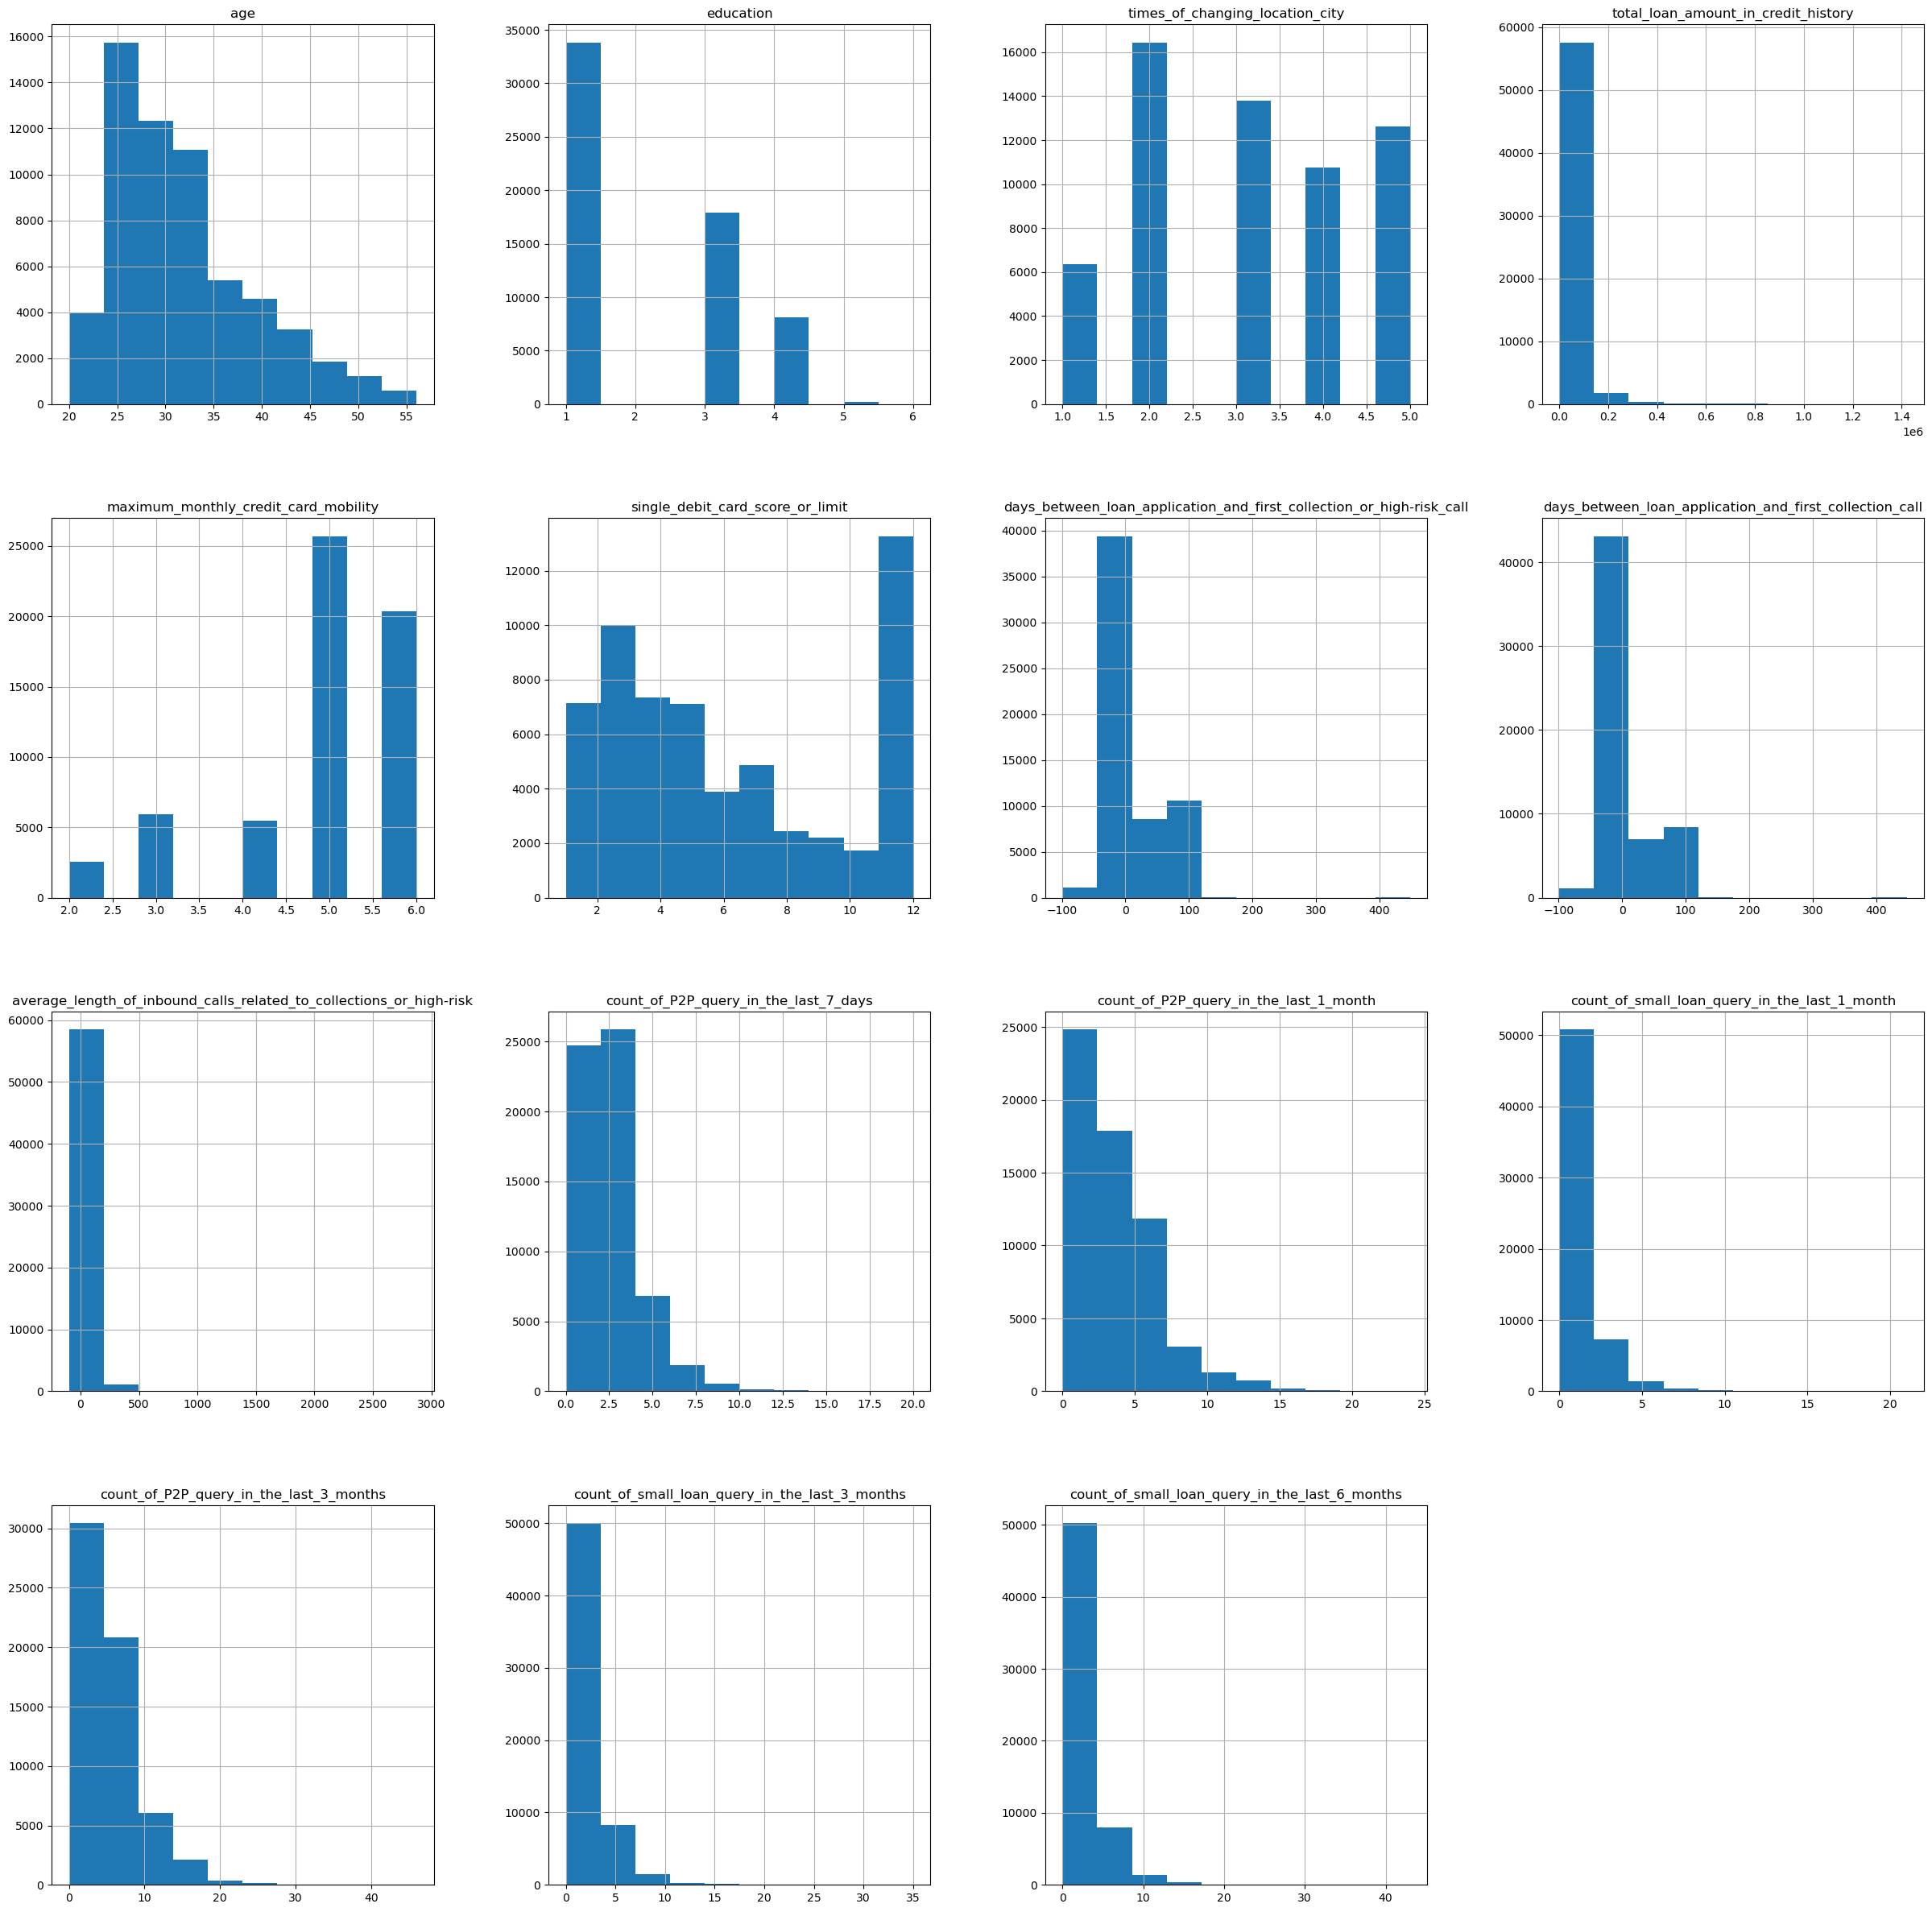

In [60]:
# Plot distribution histograms for each raw input variable
X_train.hist(figsize = (30, 30) )
plt.show()

In [61]:
# Create categorical variables 
def binning(var):
    X_train[var + '_bin'] = pd.qcut(X_train[var],10,duplicates='drop').values.add_categories("NoData")
    X_train[var + '_bin'] = X_train[var + '_bin'].fillna("NoData").astype(str)
    X_train[var + '_bin'].value_counts(dropna=False)
    X_train.loc[X_train[var]==-99, var + '_bin'] = -99
    X_train.loc[X_train[var]==-98, var + '_bin'] = -98
    X_train.loc[X_train[var]==-1, var + '_bin'] = -1

    
for i in features:
    binning(i)

features_bin = [f + '_bin' for f in features]
features_bin

['age_bin',
 'education_bin',
 'times_of_changing_location_city_bin',
 'total_loan_amount_in_credit_history_bin',
 'maximum_monthly_credit_card_mobility_bin',
 'single_debit_card_score_or_limit_bin',
 'days_between_loan_application_and_first_collection_or_high-risk_call_bin',
 'days_between_loan_application_and_first_collection_call_bin',
 'average_length_of_inbound_calls_related_to_collections_or_high-risk_bin',
 'count_of_P2P_query_in_the_last_7_days_bin',
 'count_of_P2P_query_in_the_last_1_month_bin',
 'count_of_small_loan_query_in_the_last_1_month_bin',
 'count_of_P2P_query_in_the_last_3_months_bin',
 'count_of_small_loan_query_in_the_last_3_months_bin',
 'count_of_small_loan_query_in_the_last_6_months_bin']

###  2.3 Data Analysis - Distribution & Relationships <a class="anchor" id="23"></a>

Now, we start with understanding the relationships between the independent variables and the target variable, as well as the distribution of each independent variable. Detailed analysis is provided after the data plotting. 

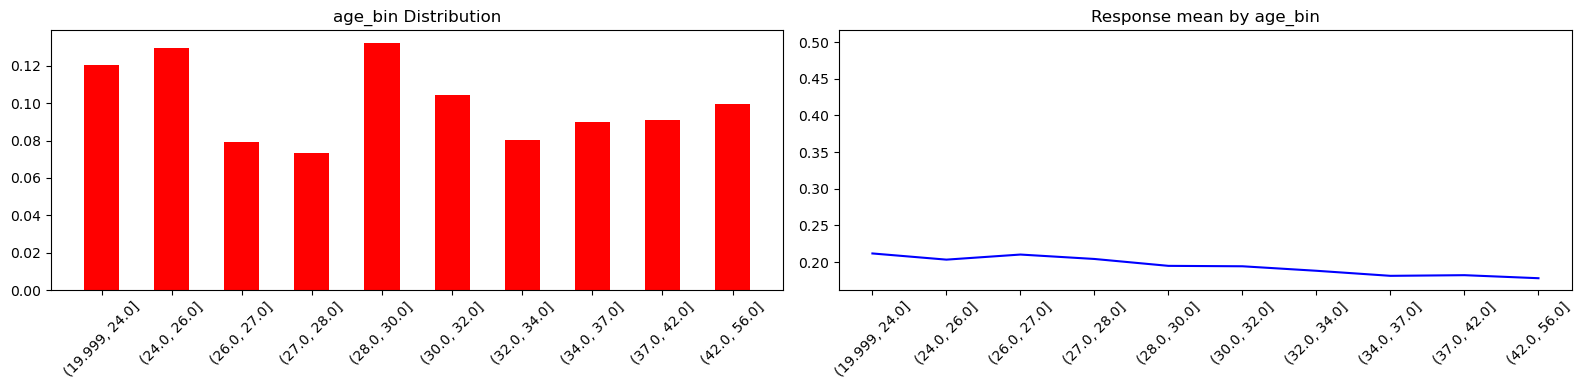

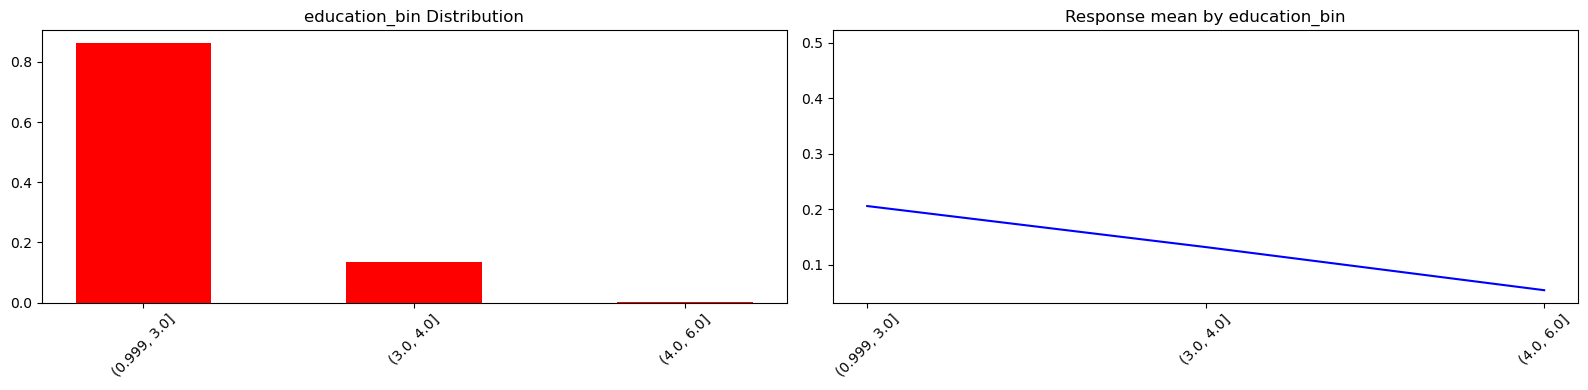

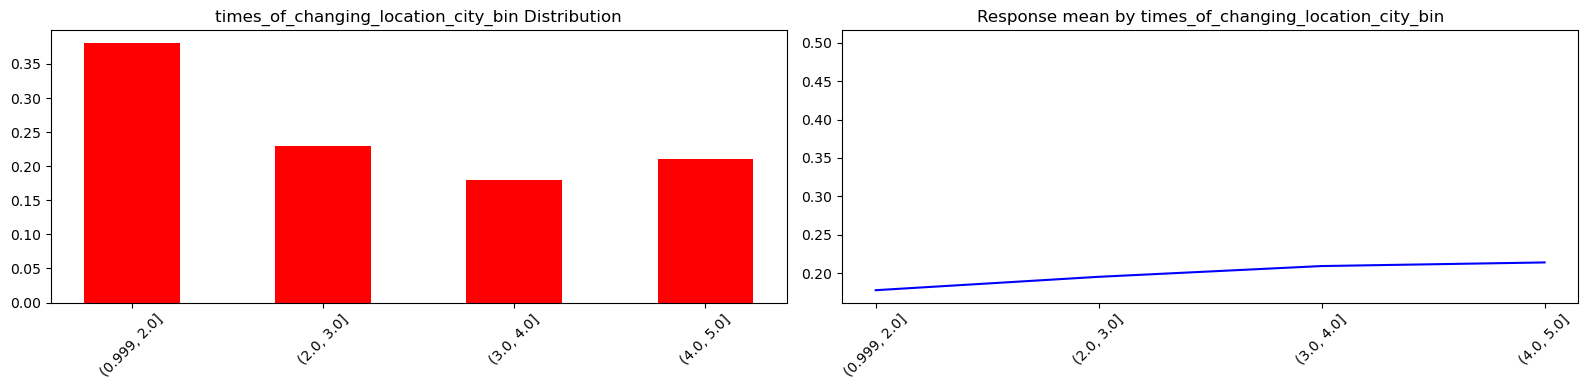

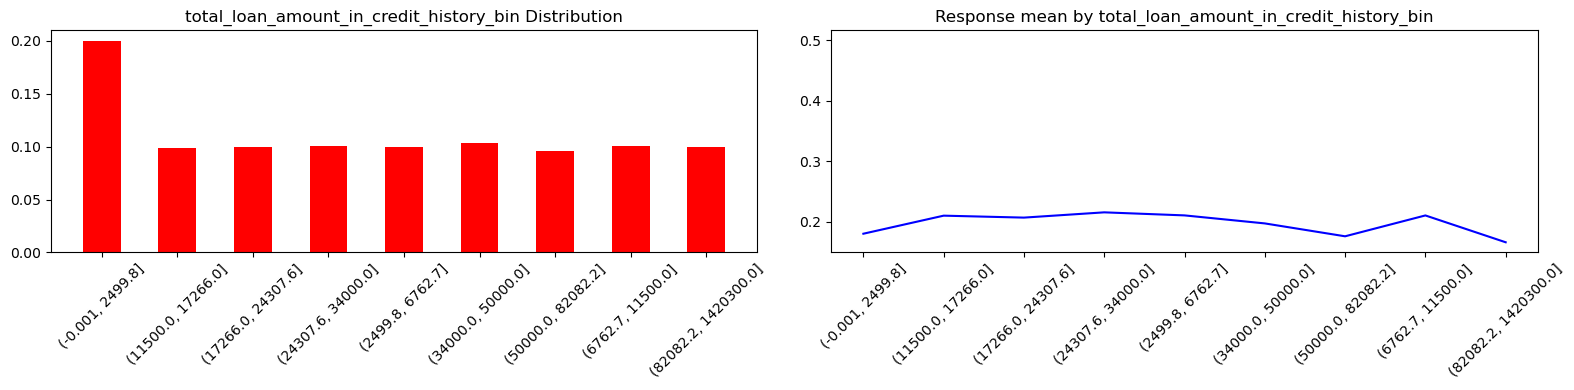

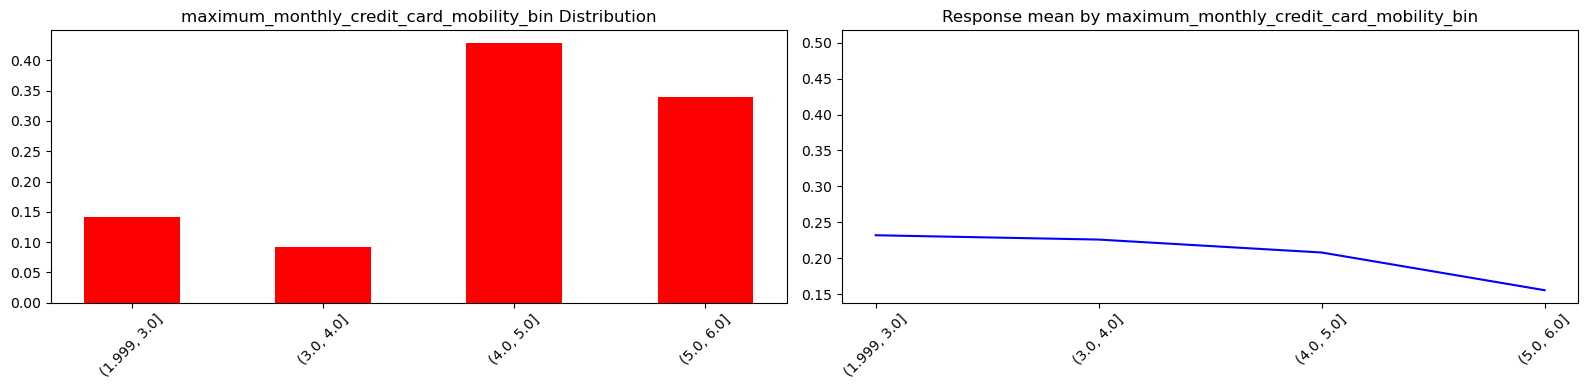

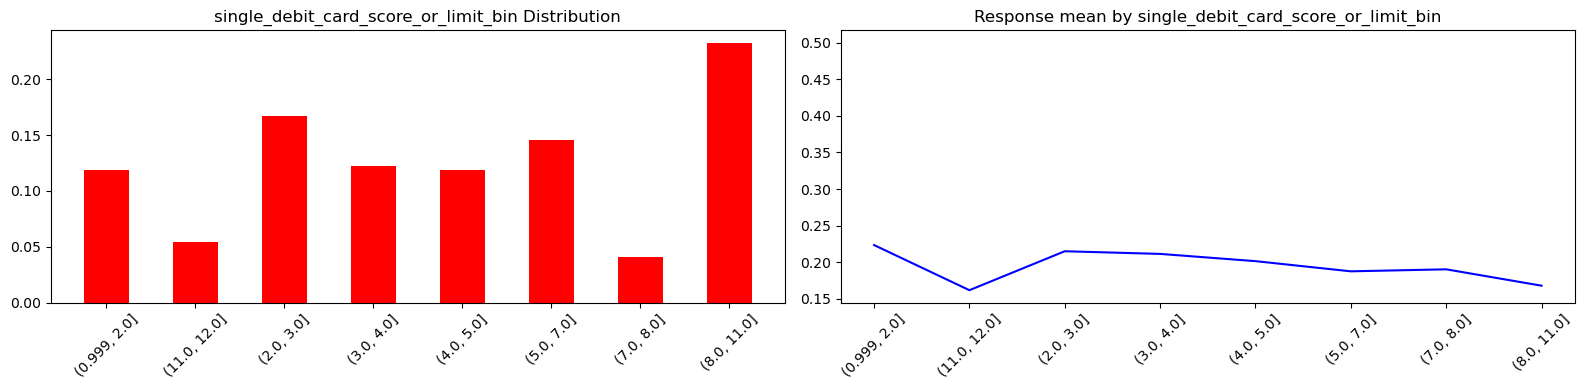

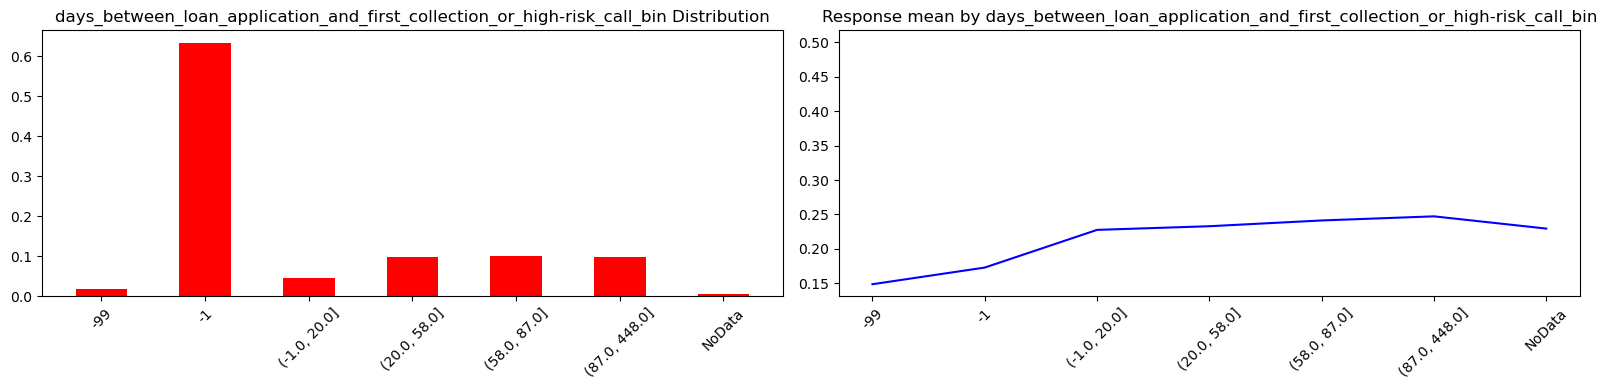

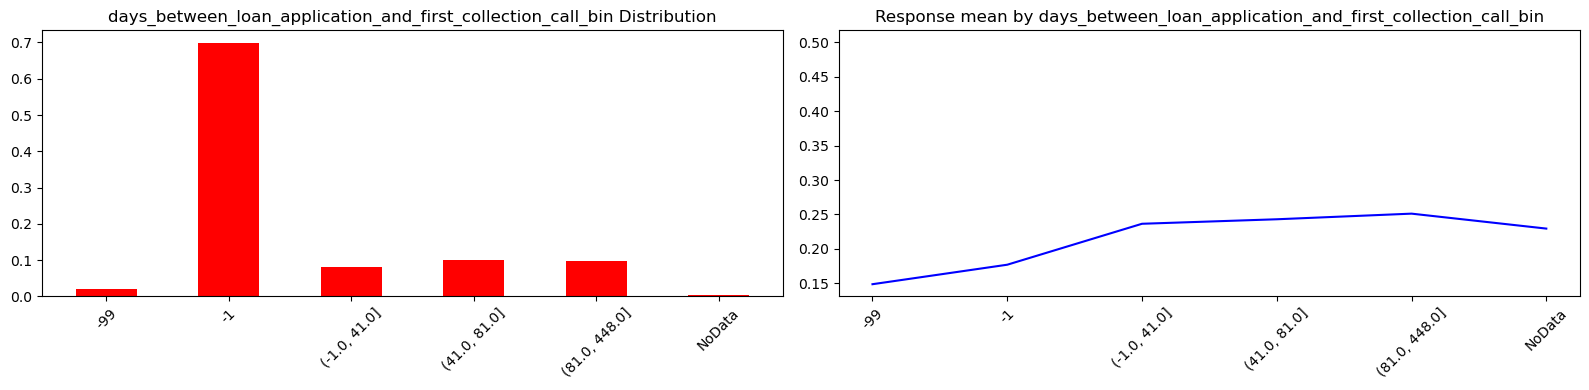

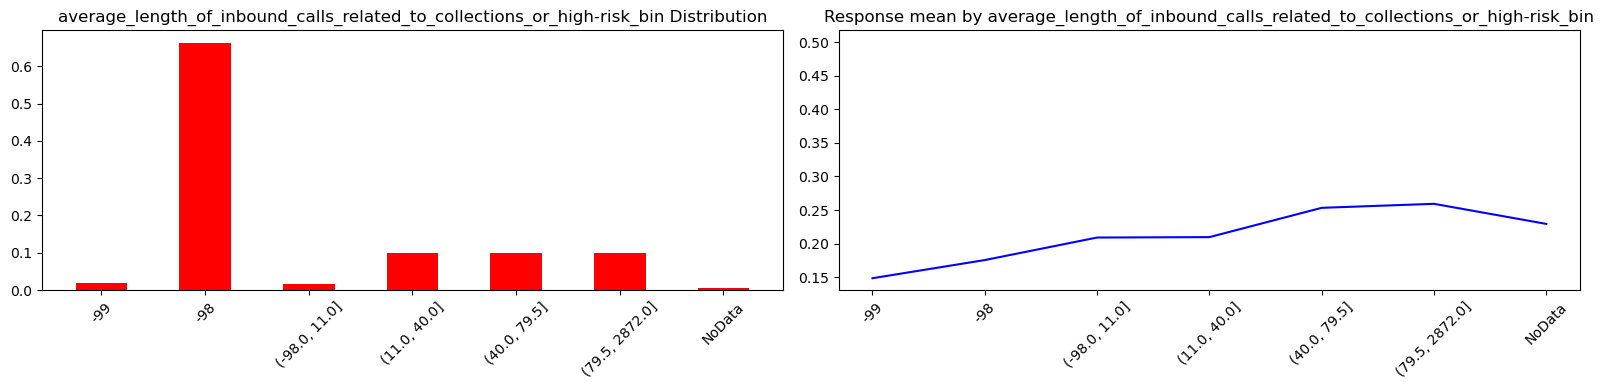

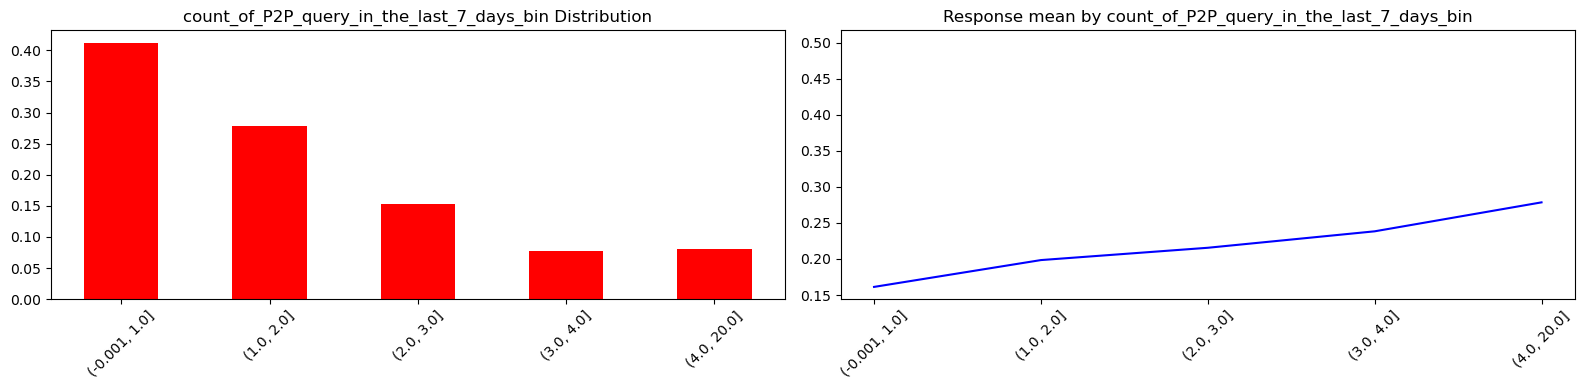

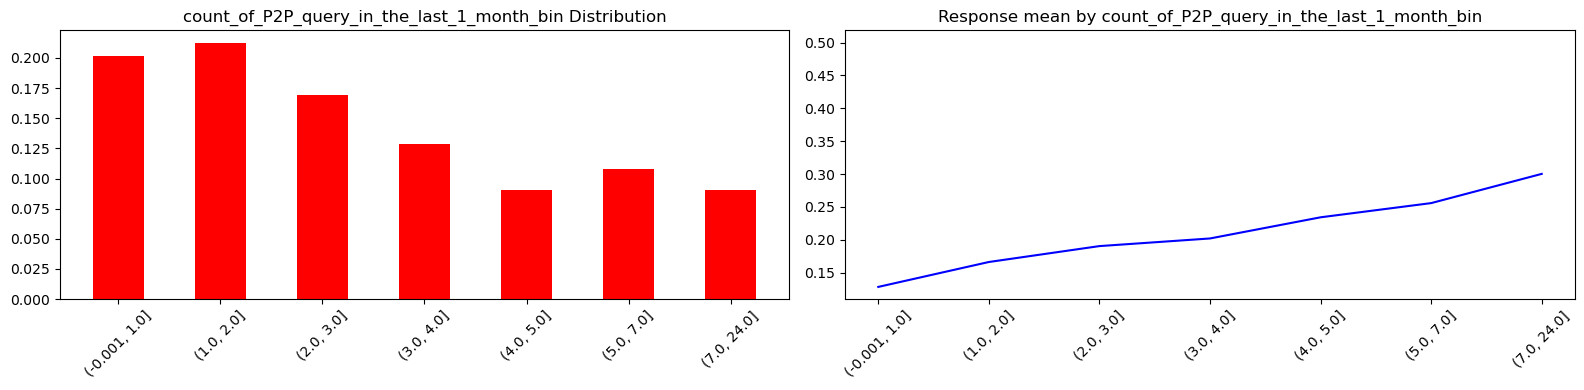

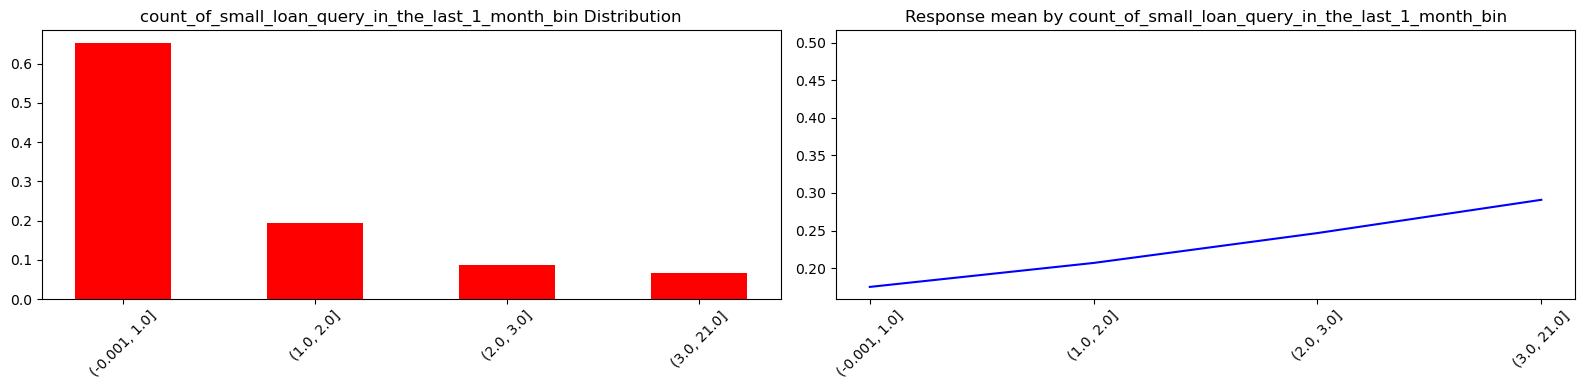

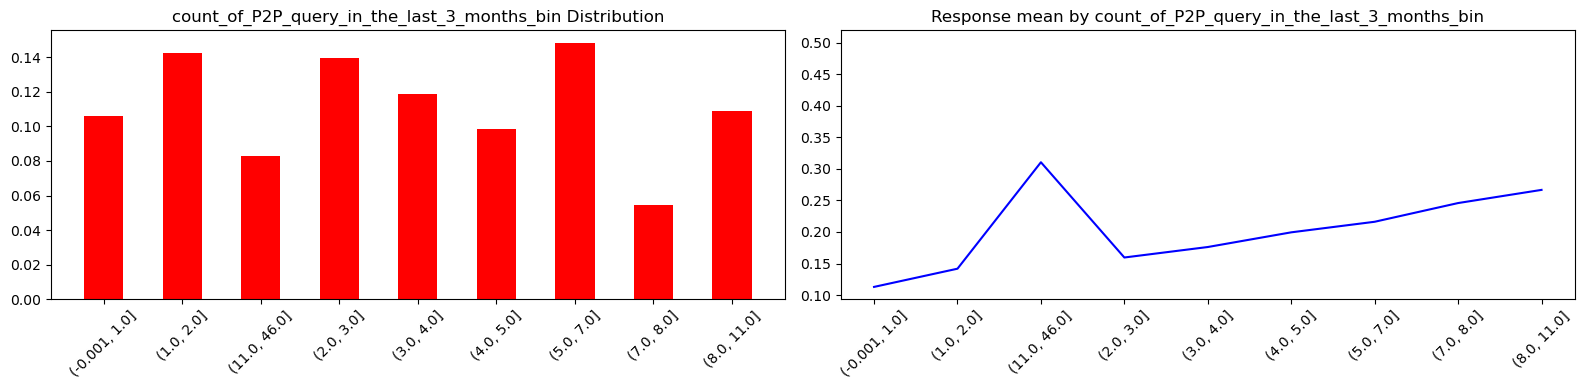

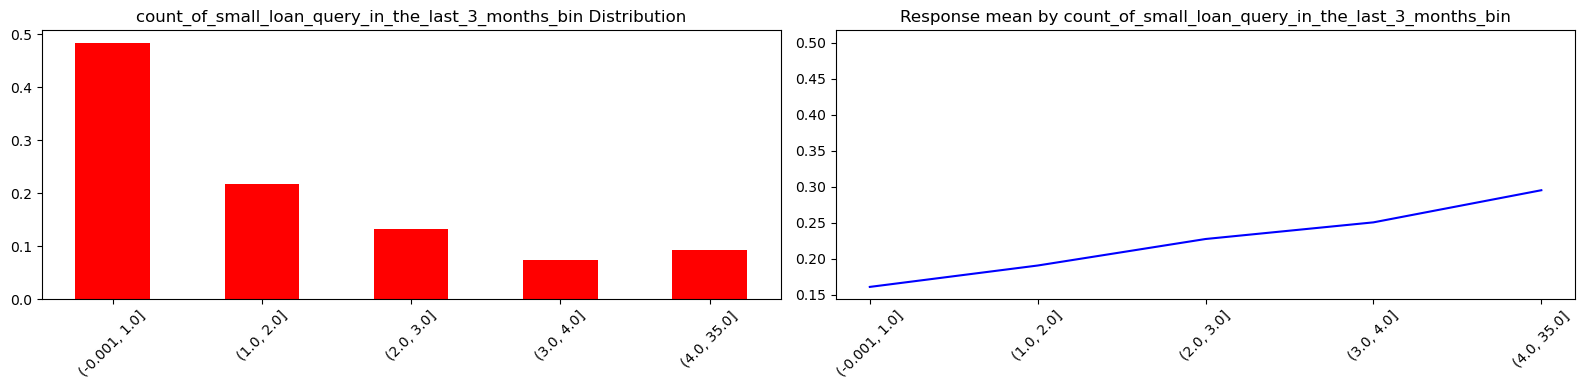

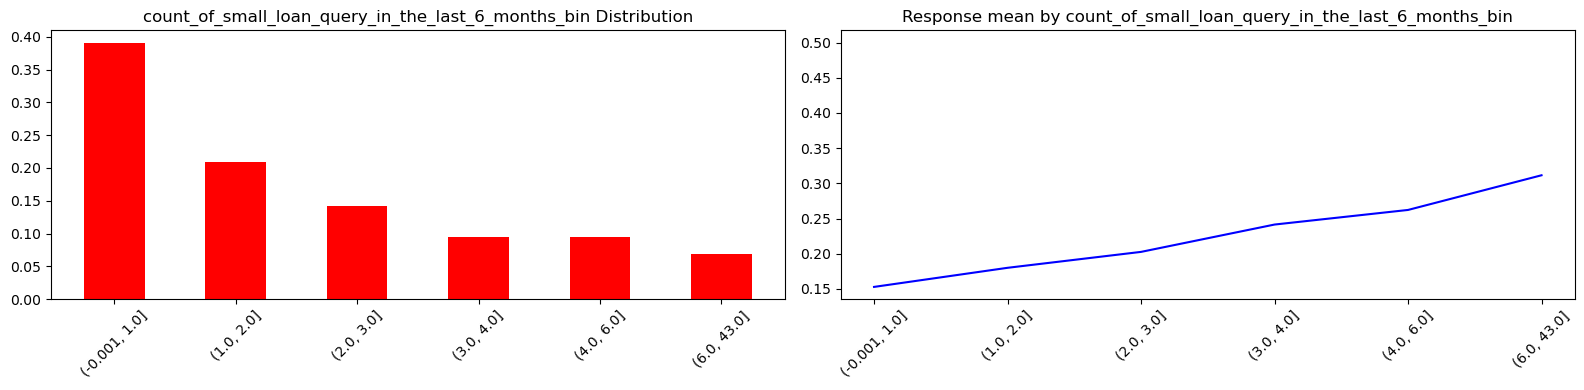

In [62]:
train_df = pd.concat([X_train, Y_train], axis=1)

# X is each of the categorical input variables, Y is the target variable 
# Plot the distribution of X and its relationships with Y 
def plot_X_and_Y(var):

    # Calculate the count of Y in each category, and its distribution
    z = train_df.groupby(var)['target'].agg(['count','mean']).reset_index() 
    z['count_pcnt'] = z['count']/z['count'].sum()
    x = z[var]
    y_mean = z['mean']
    count_pcnt = z['count_pcnt']
    ind = np.arange(0, len(x))
    width = .5
    
    # Plot the distribution of X 
    fig = plt.figure(figsize=(16,4))
    plt.subplot(121)
    plt.bar(ind, count_pcnt, width, color='r')
    plt.title(var + ' Distribution')
    plt.xticks(ind,x.tolist(), rotation=45)
    
    # Plot line chart of Y's mean by each X's categories 
    plt.subplot(122)
    plt.plot(ind, y_mean, width, color='b')
    plt.xticks(ind,x.tolist(), rotation=45)
    plt.tight_layout()
    plt.title('Response mean by ' + var)
    plt.show()
    
for i in features_bin:
    plot_X_and_Y(i)  

All the 15 variables have been converted to categorical variables. Here are the analysis for their distributions and relationships with the possibility of loan default.
1. <B>age</B>: The distribution of each age group is quite average. Its relationship with the possibility of default is not significant. 
2. <B>education</B>: Most people's education levels are lower than 3, while its negative relationship with the possibility of default is obvious. The higher the education level, the lower the possibility of default.
3. <B>times of changing location city</B>: Its distribution is slightly right skewed, and it also slightly contribute to a positive effect for the possibility of default.
4. <B>total loan amount in credit history</B>: The overall ditribution is average, other than the biggest (around 2 times to the other groups' average) portion of group, which is the smallest loan amount. However, I cannot observe its significant effect to the possibility of default.
5. <B>maximum monthly credit card mobility</B>: The distribution is left skewed, and the people have a maximum monthly credit card mobility as around 6 times (the highest) tend to have lowest possibility of default. 
6. <B>single debit card score</B>: The people have the highest single debit card score as around 12 tend to have lowest possibility of default. 
7. <B>days between loan application and first collection or high-risk call</B>: The distribution is extremly right skewed. Most of people have a negative value in this variable, and the only negative value category is associated with the lowest possibility of default. It could be due to system issues or data entry errors, treating low risk group (people did not receive any collection or high risk calls, or only receive periodic check from banks) as negative values. 
8. <B>days between loan application and first collection call</B>: Similar as above, the distribution is extremly right skewed. Most of people have a negative value in this variable, and the only negative value category is associated with the lowest possibility of default. It could be due to system issues or data entry errors, treating low risk group (people did not receive any collection calls, or only receive periodic check from banks) as negative values. 
9. <B>average length of inbound calls related to collections or high-risk</B>: Similar as above, the distribution is extremly right skewed. Most of people have a extreme negative value (around -99 ~ -98) in this variable, and this negative value category is associated with the lowest possibility of default. It could be due to system issues or data entry errors, treating low risk group (people did not receive any collection or high risk calls, or only receive periodic check from banks) as negative values. 
10. <B>count of P2P query in the last 7 days</B>: The distribution is right skewed, and it is positively related to the possibility of default. The more P2P queries in the last 7 days made by the borrower, the higher the possibility of default.
11. <B>count of P2P query in the last 1 month</B>: Similar as above, the distribution is right skewed, and it is positively related to the possibility of default. The more P2P queries in the last 1 month made by the borrower, the higher the possibility of default.
12. <B>count of small loan query in the last 1 month</B>: Similar as above, the distribution is right skewed, and it is positively related to the possibility of default. The more small loan queries in the last 1 month made by the borrower, the higher the possibility of default.
13. <B>count of P2P query in the last 3 months</B>: Similar as above, although the distribution is relatively average, and it is positively related to the possibility of default. The more P2P queries in the last 3 months made by the borrower, the higher the possibility of default.
14. <B>count of small loan query in the last 3 months</B>: Similar as above, the distribution is right skewed, and it is positively related to the possibility of default. The more small loan queries in the last 3 months made by the borrower, the higher the possibility of default.
15. <B>count of small loan query in the last 6 months</B>: Similar as above, the distribution is right skewed, and it is positively related to the possibility of default. The more small loan queries in the last 6 months made by the borrower, the higher the possibility of default.

To sum up, these are the variables that related to the possibility of default, which should raise creditor's attention while setting risk red flag and conducting risk analysis:
- application details 
    - education
    - times of changing location city
- credit history 
    - maximum monthly credit card mobility
    - single debit card score
- call records 
    - days between loan application and first collection or high-risk call
    - days between loan application and first collection call 
    - average length of inbound calls related to collections or high-risk
- financial query records (strongest effect)
    - count of P2P query in the last 7 days 
    - count of P2P query in the last 1 month
    - count of small loan query in the last 1 month
    - count of P2P query in the last 3 months
    - count of small loan query in the last 3 months 
    - count of small loan query in the last 6 months

## Section 3 Feature Engineering <a class="anchor" id="3"></a>

###  3.1 WOE Transformation <a class="anchor" id="31"></a>

Weight of evidence (WOE) is a widely used technique in credit risk modeling or called the probability of default modeling (such models predict how capable an applicant can repay the loan). The goal of WOE transformation is to get the maximum difference among the binned categories relating to the target variable. In this transformation, the information of the target variable has been utilized. The dataset contains many categorical variables with many categories. These categories are distributed very differently are have various significant impact to the possibility of default as discussed above. Therefore, WOE is a good choice for feature engineering here.

In [64]:
#X_train['average length of inbound calls related to collections or high-risk'] = X_train['average length of inbound calls related to collections or high-risk'].fillna('NoData')
#X_train['days between loan application and first collection or high-risk call'] = X_train['days between loan application and first collection or high-risk call'].fillna('NoData')
#X_train['days between loan application and first collection call'] = X_train['days between loan application and first collection call'].fillna('NoData')

# Calculate WOE for each binned category 
import category_encoders as ce

ec = ce.WOEEncoder()

def WOE(var):
    X_train[var] = X_train[var].fillna('NoData')
    X = X_train[var]
    y = Y_train
    X_WOE = ec.fit(X, y)
    X_cleaned = ec.transform(X).round(2)
    X_train[var + '_WOE'] = X_cleaned 
    
for i in features_bin:
    WOE(i)  

In [65]:
X_train.head(5)

,age,education,times_of_changing_location_city,total_loan_amount_in_credit_history,maximum_monthly_credit_card_mobility,single_debit_card_score_or_limit,days_between_loan_application_and_first_collection_or_high-risk_call,days_between_loan_application_and_first_collection_call,average_length_of_inbound_calls_related_to_collections_or_high-risk,count_of_P2P_query_in_the_last_7_days,...,single_debit_card_score_or_limit_bin_WOE,days_between_loan_application_and_first_collection_or_high-risk_call_bin_WOE,days_between_loan_application_and_first_collection_call_bin_WOE,average_length_of_inbound_calls_related_to_collections_or_high-risk_bin_WOE,count_of_P2P_query_in_the_last_7_days_bin_WOE,count_of_P2P_query_in_the_last_1_month_bin_WOE,count_of_small_loan_query_in_the_last_1_month_bin_WOE,count_of_P2P_query_in_the_last_3_months_bin_WOE,count_of_small_loan_query_in_the_last_3_months_bin_WOE,count_of_small_loan_query_in_the_last_6_months_bin_WOE
69120,24,3,1,0,3,3,-1.0,-1.0,-98.0,2,...,0.12,-0.15,-0.12,-0.13,0.02,-0.20,-0.13,-0.38,-0.24,-0.30
78784,28,3,5,28200,5,4,-1.0,-1.0,-98.0,1,...,0.10,-0.15,-0.12,-0.13,-0.23,0.35,0.07,0.62,0.19,0.38
23858,27,4,3,606,6,12,-1.0,-1.0,-98.0,3,...,-0.23,-0.15,-0.12,-0.13,0.12,-0.03,-0.13,0.03,-0.03,0.05
5063,31,1,2,18000,5,12,-1.0,-1.0,-98.0,6,...,-0.23,-0.15,-0.12,-0.13,0.46,0.35,-0.13,0.30,-0.24,-0.30
63511,44,1,5,1500,4,3,-1.0,-1.0,-98.0,2,...,0.12,-0.15,-0.12,-0.13,0.02,0.04,-0.13,0.03,-0.24,-0.30


Train dataset now contains both raw variables and categorical variables after WOE transformation. Only WOE will be left for predictive modeling. 

###  3.2 Aligning Train & Test Dataset <a class="anchor" id="32"></a>

The same feature engineering process will be conducted to test dataset, to align its data with the train dataset. 

In [66]:
# Feature engineering for test dataset

# Create categorical variables
def binning(var):
    X_test[var + '_bin'] = pd.qcut(X_test[var],10,duplicates='drop').values.add_categories("NoData")
    X_test[var + '_bin'] = X_test[var + '_bin'].fillna("NoData").astype(str)
    X_test[var + '_bin'].value_counts(dropna=False)
    X_test.loc[X_test[var]==-99, var + '_bin'] = -99
    X_test.loc[X_test[var]==-98, var + '_bin'] = -98
    X_test.loc[X_test[var]==-1, var + '_bin'] = -1
    
for i in features:
    binning(i)

features_bin = [f + '_bin' for f in features]

# WOE transformation
ec = ce.WOEEncoder()

def WOE(var):
    X_test[var] = X_test[var].fillna('NoData')
    X = X_test[var]
    y = Y_test
    X_WOE = ec.fit(X, y)
    X_cleaned = ec.transform(X)
    X_cleaned.round(2)
    X_test[var + '_WOE'] = X_cleaned 
    
for i in features_bin:
    WOE(i)

WOE will be used as the updated variables for predictive modeling. 

In [67]:
# Update both train and test datasets with variables after feature engineering
X_train_fe = X_train.iloc[:,30:45]
X_test_fe = X_test.iloc[:,30:45]

In [68]:
X_train_fe.head(5)

,age_bin_WOE,education_bin_WOE,times_of_changing_location_city_bin_WOE,total_loan_amount_in_credit_history_bin_WOE,maximum_monthly_credit_card_mobility_bin_WOE,single_debit_card_score_or_limit_bin_WOE,days_between_loan_application_and_first_collection_or_high-risk_call_bin_WOE,days_between_loan_application_and_first_collection_call_bin_WOE,average_length_of_inbound_calls_related_to_collections_or_high-risk_bin_WOE,count_of_P2P_query_in_the_last_7_days_bin_WOE,count_of_P2P_query_in_the_last_1_month_bin_WOE,count_of_small_loan_query_in_the_last_1_month_bin_WOE,count_of_P2P_query_in_the_last_3_months_bin_WOE,count_of_small_loan_query_in_the_last_3_months_bin_WOE,count_of_small_loan_query_in_the_last_6_months_bin_WOE
69120,0.10,0.07,-0.11,-0.10,0.22,0.12,-0.15,-0.12,-0.13,0.02,-0.20,-0.13,-0.38,-0.24,-0.30
78784,0.06,0.07,0.12,0.12,0.08,0.10,-0.15,-0.12,-0.13,-0.23,0.35,0.07,0.62,0.19,0.38
23858,0.09,-0.47,0.00,-0.10,-0.28,-0.23,-0.15,-0.12,-0.13,0.12,-0.03,-0.13,0.03,-0.03,0.05
5063,-0.01,0.07,-0.11,0.07,0.08,-0.23,-0.15,-0.12,-0.13,0.46,0.35,-0.13,0.30,-0.24,-0.30
63511,-0.11,0.07,0.12,-0.10,0.19,0.12,-0.15,-0.12,-0.13,0.02,0.04,-0.13,0.03,-0.24,-0.30


## Section 4 Predictive Modeling <a class="anchor" id="4"></a>

Using the variables analysed above, we are able to conduct predictive modeling. The logistic regression is a well-established technique employed in evaluating the probability of occurrence of a default. I am going to conduct logistic regression models, firstly using raw dataset, and then using variables after feature engineering. By comparing the Receiver Operating Characteristic (ROC) curve and Area under the ROC Curve (AUC), I will measure the model improvement after feature engineering.

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

# Logistic regression model using raw data
# Initialize the logistic regression model
logreg = LogisticRegression()

# since logistic regression model does not accept missing value, NaN values are filled with 0
X_train_raw.fillna(0, inplace=True)
X_test_raw.fillna(0, inplace=True)

# Fit the model to the training data
logreg.fit(X_train_raw, Y_train)

# Obtain the predicted probabilities for the positive class
Y_pred_prob_raw = logreg.predict_proba(X_test_raw)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values
fpr_raw, tpr_raw, thresholds_raw = roc_curve(Y_test, Y_pred_prob_raw)

# Calculate the AUC score
auc_raw = roc_auc_score(Y_test, Y_pred_prob_raw)

In [70]:
# Logistic regression model using data after feature engineering
# Initialize the logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train_fe, Y_train)

# Obtain the predicted probabilities for the positive class
Y_pred_prob_fe = logreg.predict_proba(X_test_fe)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values
fpr_fe, tpr_fe, thresholds_fe = roc_curve(Y_test, Y_pred_prob_fe)

# Calculate the AUC score
auc_fe = roc_auc_score(Y_test, Y_pred_prob_fe)

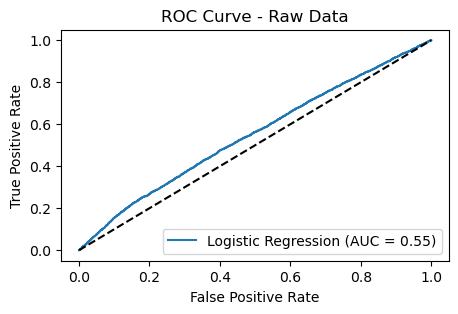

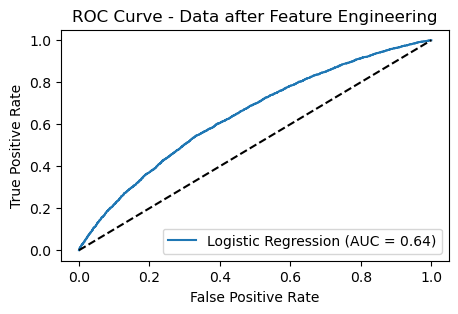

In [37]:
# Plot the ROC curve of the logistic regression model using raw data
plt.figure(figsize=(5, 3))
plt.plot(fpr_raw, tpr_raw, label='Logistic Regression (AUC = {:.2f})'.format(auc_raw))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Raw Data')
plt.legend(loc='lower right')
plt.show()

# Plot the ROC curve of the logistic regression model using data after feature engineering
plt.figure(figsize=(5, 3))
plt.plot(fpr_fe, tpr_fe, label='Logistic Regression (AUC = {:.2f})'.format(auc_fe))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Data after Feature Engineering')
plt.legend(loc='lower right')
plt.show()

- Comparing the ROC curves of two models above, we can see that the model with data after feature engineering generates a higher AUC (0.64) than the one with raw data (0.55). 
- The AUC represents the model's ability to distinguish between positive and negative cases. The model trained on the raw dataset yielded an AUC of 0.55, which suggests that its predictive performance is slightly better than random guessing. On the other hand, the model trained on the dataset after feature engineering achieved an AUC of 0.64, indicating improved performance compared to the raw dataset model.
- The increase in AUC from 0.55 to 0.64 suggests that the feature engineering process helped the model capture more meaningful patterns or relationships in the data, resulting in better predictions of loan default possibility. It indicates that the engineered features provided additional information or improved the model's ability to discriminate between default and non-default cases.
- Overall, a higher AUC value indicates that the model has a better ability to differentiate between loan default and non-default instances. In this loan default prediction case, the feature engineering process has contributed to an improvement in the model's predictive performance.